# Evaluation

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Read in Results

### Read in User Curation

In [69]:
user_curation_df = pd.read_csv('./user_feedback/user_curation.csv')


In [70]:
user_curation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_variable     312 non-null    object 
 1   user_description  312 non-null    object 
 2   matched_text      312 non-null    object 
 3   uid               312 non-null    int64  
 4   relevance_score   312 non-null    float64
 5   llm_alignment     104 non-null    object 
 6   cohere_rank       312 non-null    object 
 7   llm_rank          104 non-null    object 
 8   cohere_llm_match  104 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 22.1+ KB


In [71]:
llm_relevancy_list_v2 = [float(i) for i in user_curation_df['relevance_score']]
print(sum(llm_relevancy_list_v2))

211.206803533


In [72]:
avg_llm_relevancy_v2 = sum(llm_relevancy_list_v2)/len(llm_relevancy_list_v2)
print(f"The average llm relevancy score is: {avg_llm_relevancy_v2}")

The average llm relevancy score is: 0.6769448831185897


In [73]:
cohere_feedback = [i.lower() for i in user_curation_df['cohere_rank']]




In [74]:
cohere_matches = 0
for i in range(len(llm_relevancy_list_v2)):
    if llm_relevancy_list_v2[i]<=0.3 and cohere_feedback[i]=='failure':
        cohere_matches = cohere_matches + 1
    elif llm_relevancy_list_v2[i]>0.3 and llm_relevancy_list_v2[i]<=0.7 and cohere_feedback[i]=='neutral':
        cohere_matches = cohere_matches + 1
    elif llm_relevancy_list_v2[i]>0.7 and cohere_feedback[i]=='success':
        cohere_matches = cohere_matches + 1

llm_vs_feedback_percentage = cohere_matches/len(llm_relevancy_list_v2)
print(f"Percentage of time that Cohere results matched feedback from RTI team: {llm_vs_feedback_percentage*100}%.")

Percentage of time that Cohere results matched feedback from RTI team: 38.141025641025635%.


In [82]:
llm_subset_df = user_curation_df.dropna(subset=['llm_rank'])
llm_feedback = [i.lower() for i in llm_subset_df['llm_rank']]
cohere_llm_subset_df = user_curation_df.dropna(subset=['cohere_llm_match'])
cohere_llm_agreement = [i.lower() for i in cohere_llm_subset_df['cohere_llm_match']]
cohere_rank_llm_agreement_filter = [float(i) for i in cohere_llm_subset_df['relevance_score']]

## Visualizations

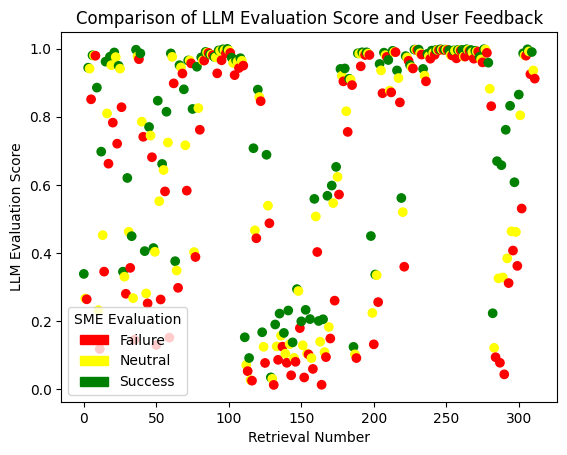

In [78]:
import matplotlib.patches as mpatches
# Cohere Relevancy score vs User Feedback
feedback_vals = cohere_feedback
colors = []
for i in range(len(cohere_feedback)):
    if (feedback_vals[i] == 'failure'): colors.append('red')
    elif (feedback_vals[i] == 'neutral'): colors.append('yellow')
    elif (feedback_vals[i] == 'success'): colors.append('green')
    else: colors[i] == 'white'

x = list(range(0, len(llm_relevancy_list_v2)))
y = llm_relevancy_list_v2
graph = plt.scatter(x, y, marker='o', c=colors)
plt.xlabel('Retrieval Number')
plt.ylabel('LLM Evaluation Score')
plt.title('Comparison of Relevancy Score and User Feedback')
plt.legend(handles=[mpatches.Patch(color='red', label='Failure'), mpatches.Patch(color='yellow', label='Neutral'), mpatches.Patch(color='green', label='Success')], title="SME Evaluation")

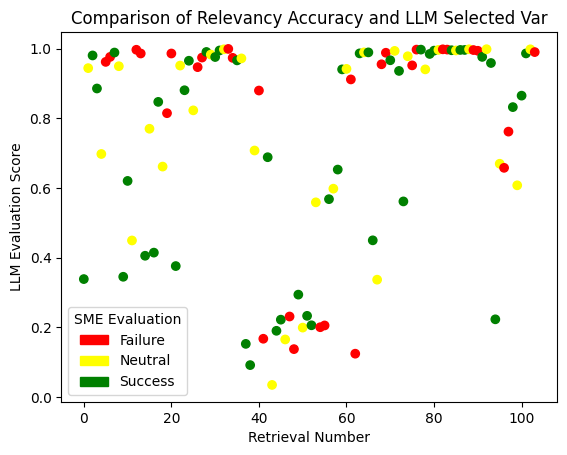

In [84]:
import matplotlib.patches as mpatches
# Cohere Relevancy score vs LLM Selected Var 

feedback_vals = cohere_llm_agreement
colors = []
for i in range(len(cohere_llm_agreement)):
    if (feedback_vals[i] == 'match'): colors.append('green')
    elif (feedback_vals[i] == 'mismatch'): colors.append('red')
    elif (feedback_vals[i] != ''): colors.append('yellow')
    else: colors[i] == 'white'

x = list(range(0, len(cohere_rank_llm_agreement_filter)))
y = cohere_rank_llm_agreement_filter
graph = plt.scatter(x, y, marker='o', c=colors)
plt.xlabel('Retrieval Number')
plt.ylabel('LLM Evaluation Score')
plt.title('Comparison of Relevancy Accuracy and LLM Selected Var')
plt.legend(handles=[mpatches.Patch(color='red', label='Failure'), mpatches.Patch(color='yellow', label='Neutral'), mpatches.Patch(color='green', label='Success')], title="SME Evaluation")